# How to determine the optimal number of clusters for k-means clustering

## We will also understand how to use the elbow method as a way to estimate the value k. Another popular method of estimating k is through silhouette analysis, a scikit learn example can be found https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

K-means Overview

Before diving into the dataset, let us briefly discuss how k-means works:

1) The process begins with k centroids initialised at random.

2) These centroids are used to assign points to its nearest cluster.

3) The mean of all points within the cluster is then used to update the position of the centroids.

4) The above steps are repeated until the values of the centroids stabilise.

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
data = pd.read_csv(r'D:\Others\PythonCode\MLinAction\Kmeans data\Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [5]:
data[continuous_features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


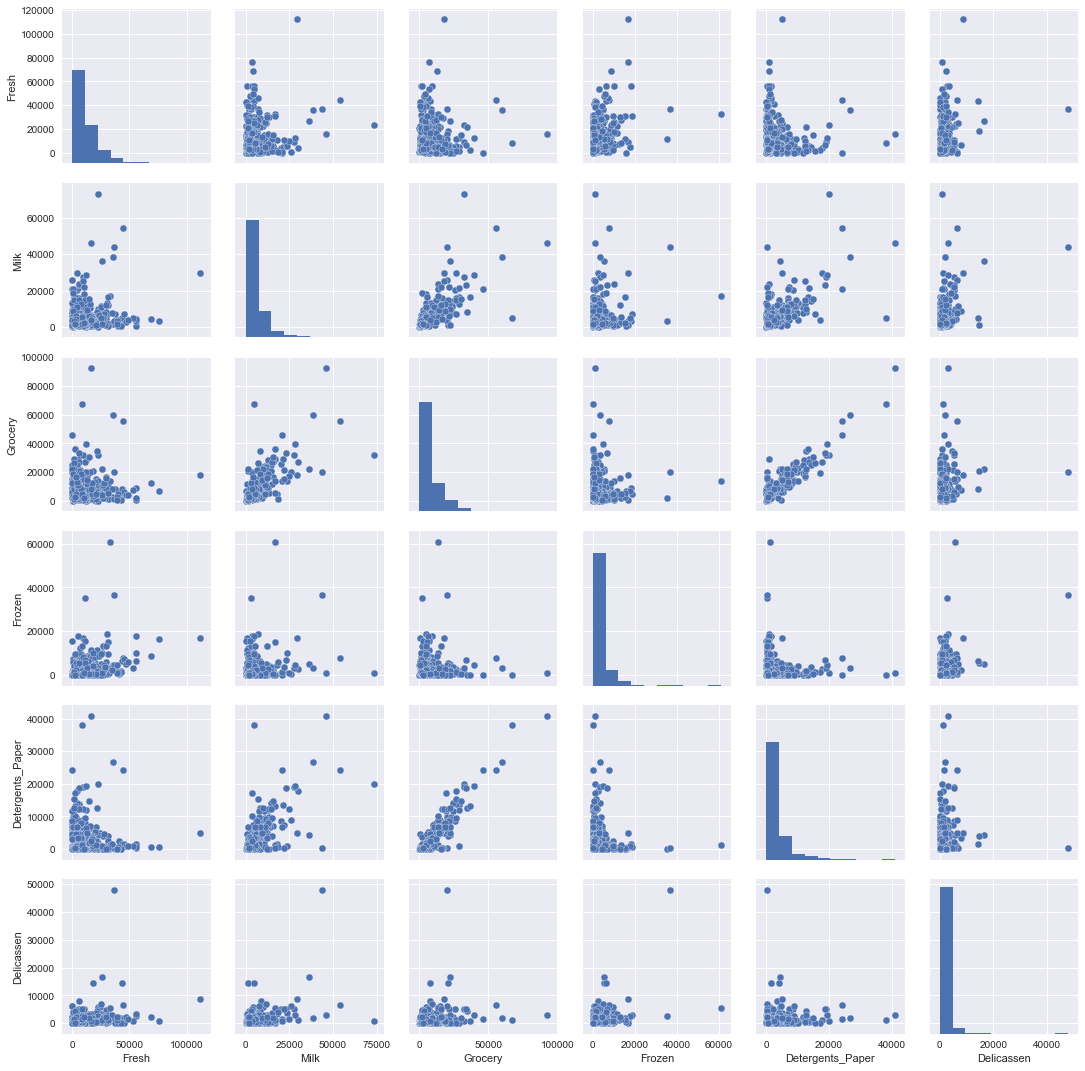

In [15]:
sns.pairplot(data, vars = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicassen'] )

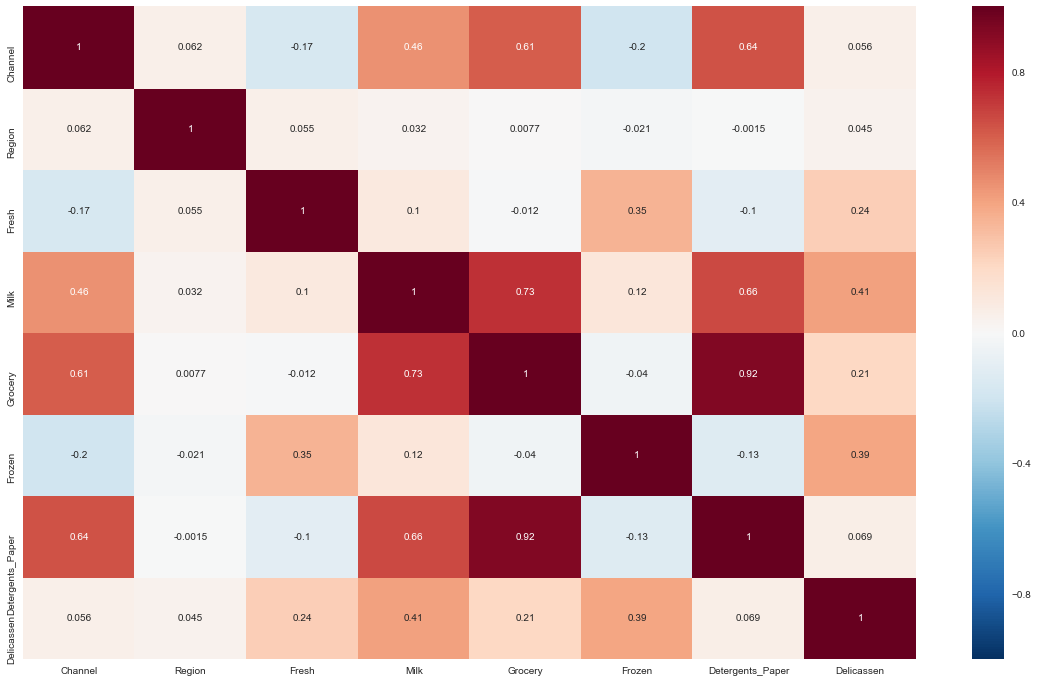

In [16]:
# co-relation between the features 

plt.figure(figsize=(20,12)) 
sns.heatmap(data.corr(), annot=True)

In [6]:
# To use the categorical features, we need to convert the categorical features to binary using pandas get dummies.

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [9]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)
data_transformed

array([[0.11294004, 0.13072723, 0.08146416, ..., 0.        , 0.        ,
        1.        ],
       [0.06289903, 0.13282409, 0.10309667, ..., 0.        , 0.        ,
        1.        ],
       [0.05662161, 0.11918086, 0.08278992, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, ..., 0.        , 0.        ,
        1.        ],
       [0.091727  , 0.02622442, 0.02402535, ..., 0.        , 0.        ,
        1.        ],
       [0.02482434, 0.02237109, 0.02702178, ..., 0.        , 0.        ,
        1.        ]])

In [12]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.
Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

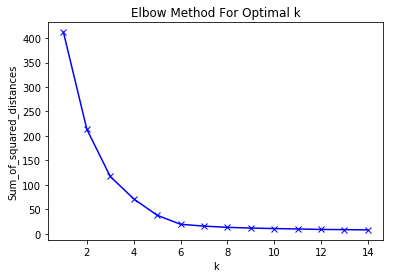

In [11]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In the plot above the elbow is at k=5 indicating the optimal k for this dataset is 5

In [17]:
kmea = KMeans(n_clusters=5)
kmea = kmea.fit(data_transformed)

# Another example

In [28]:
## here we do the clustering on random data , and the predict on the same data 

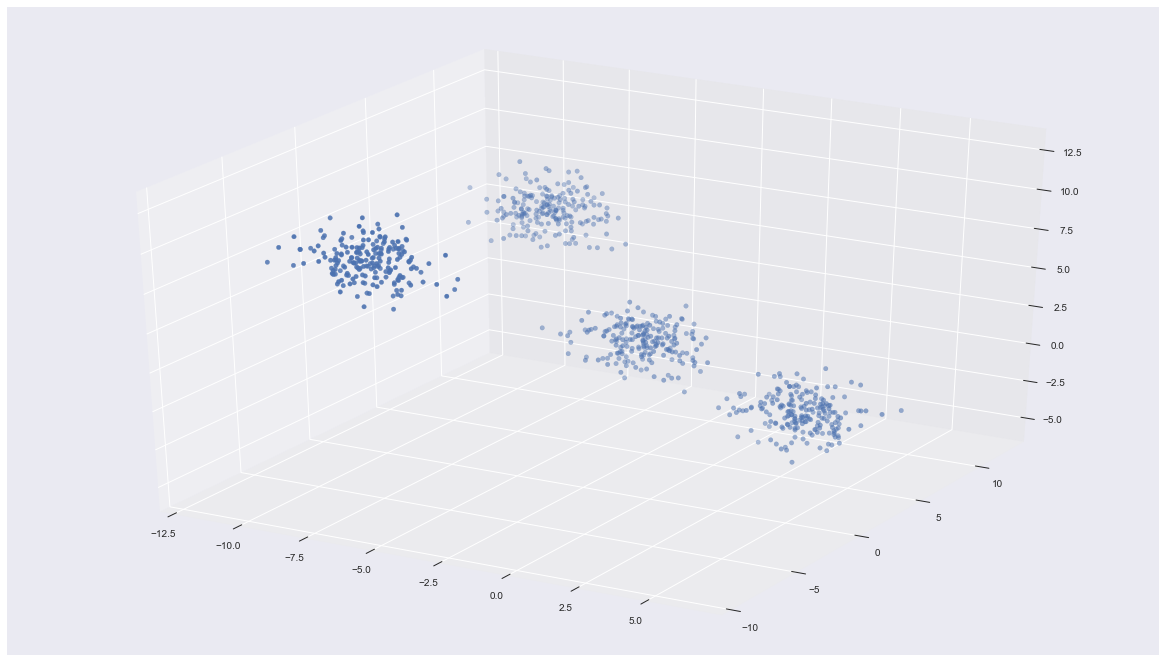

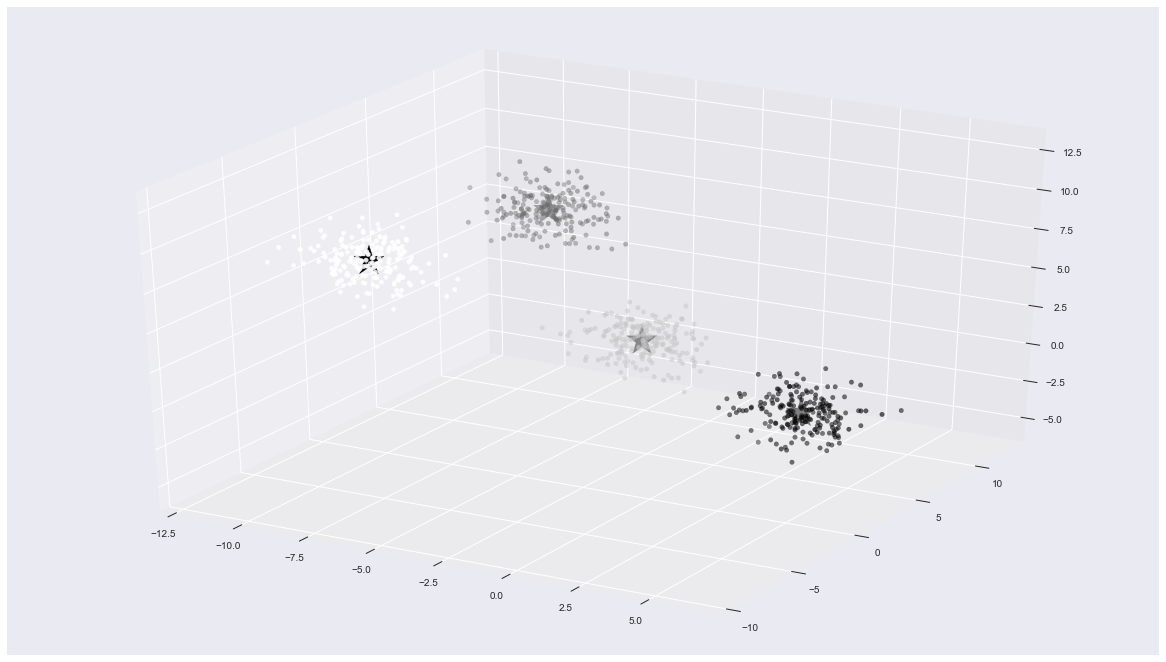

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_



fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [26]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
labels

array([1, 2, 3, 3, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 3, 0, 3, 2, 3, 1, 3, 3,
       3, 0, 0, 2, 2, 3, 2, 1, 2, 1, 2, 3, 1, 1, 3, 2, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 3, 3, 1, 3, 0, 0, 3, 1, 1, 1, 3, 0, 3, 1, 0, 3, 3, 1, 1,
       3, 2, 2, 0, 1, 3, 1, 1, 1, 2, 1, 2, 2, 1, 3, 3, 0, 2, 0, 3, 1, 1,
       2, 3, 3, 3, 1, 3, 3, 2, 3, 1, 1, 1, 1, 2, 3, 3, 1, 3, 2, 3, 3, 1,
       2, 2, 3, 2, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 2, 2, 3, 0, 0, 2, 1,
       3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 2, 1, 0, 0, 3, 0, 0, 1, 3, 3,
       0, 0, 3, 0, 0, 2, 2, 0, 3, 0, 1, 2, 3, 2, 0, 2, 0, 3, 1, 2, 2, 0,
       0, 0, 3, 1, 0, 2, 3, 0, 3, 2, 3, 2, 1, 0, 1, 0, 1, 2, 2, 0, 1, 0,
       3, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 3, 1, 1, 2, 0, 3, 2, 0, 1, 1,
       0, 2, 1, 0, 2, 1, 0, 3, 1, 3, 0, 1, 2, 3, 1, 0, 2, 1, 0, 0, 0, 3,
       2, 2, 1, 3, 0, 0, 1, 0, 3, 0, 3, 1, 1, 3, 2, 3, 0, 1, 0, 3, 3, 0,
       0, 1, 2, 3, 1, 3, 0, 2, 3, 2, 0, 2, 2, 0, 2, 3, 0, 1, 1, 2, 3, 3,
       3, 2, 2, 3, 3, 2, 3, 3, 2, 0, 1, 0, 0, 1, 2,

In [30]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmt = KMeans(n_clusters=k)
    kmt = kmt.fit(X)
    Sum_of_squared_distances.append(kmt.inertia_)

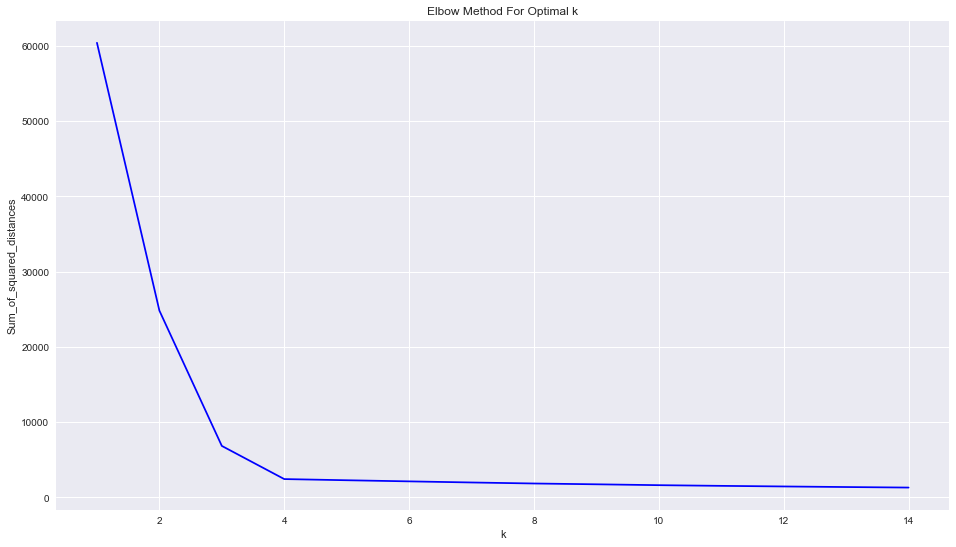

In [31]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()